In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import network_distance as nd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial import distance

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

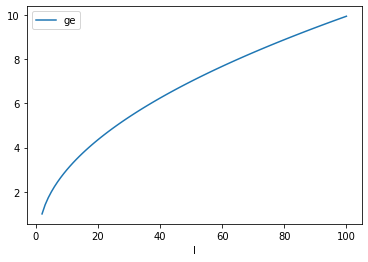

In [2]:
df = []

for l in range(2, 101):
    G = nx.path_graph(l)             # Creating longer and longer path graphs: O-O-O-O-O is a path graph with l = 5
    v1 = {0: 1}                      # In the first vector, the leftmost node in the path graph has value 1, everything else has value 0
    v2 = {l - 1: 1}                  # In the second vector, the rightmost node in the path graph has value 1, everything else has value 0
    df.append((l, nd.ge(v1, v2, G))) # We store the generalized euclidean values in a list of tuples, each tuple is (l, ge_value)

df = pd.DataFrame(data = df, columns = ("l", "ge")) # Convert list of tuples into a pandas dataframe
df = df.set_index("l")                              # Index by l value

df.plot()  # Make a plot with l (the index) on the x-axis and all other columns (in this case just ge) on the y axis.
plt.show()

In [3]:
vector_df = pd.read_csv("../data/obama_nodevectors.csv")                         # Load the data. Comma-separated. 3 columns: node id, then two values per node.

vector_df["X"] -= vector_df["X"].min()                                           # The technique to estimate graph variances cannot handle negative values
vector_df["Y"] -= vector_df["Y"].min()

v1_dict = vector_df.set_index("node").to_dict()["X"]                             # Convert each variable to a "node -> value" dict
v2_dict = vector_df.set_index("node").to_dict()["Y"]

# Read comma-separated edge list with one edge per line into a networkx undirected graph object
G = nx.read_edgelist("../data/obama_edgelist.csv", delimiter = ",", nodetype = int)

nodes = sorted(list(set(v1_dict.keys()) | set(v2_dict.keys())))                  # Get a list of all the nodes for which we have a value

v1_array = np.array([v1_dict[node] if node in v1_dict else 0 for node in nodes]) # Convert dicts into a numpy array by iterating over the nodelist (to preserve order)
v2_array = np.array([v2_dict[node] if node in v2_dict else 0 for node in nodes])

In [4]:
print(f"""
Euclidean distance: {distance.euclidean(v1_array, v2_array)};
Pearson correlation: {pearsonr(v1_array, v2_array)};
X variance: {np.var(v1_array)};
Y variance: {np.var(v2_array)}.
""")


Euclidean distance: 5.896934065282218;
Pearson correlation: PearsonRResult(statistic=0.8295942972278013, pvalue=5.089008071273281e-53);
X variance: 0.22515240634802855;
Y variance: 0.07401456886131398.



In [5]:
# Set normed to False because otherwise the method will normalize the input vectors so they sum to 1
print(f"""
Graph Euclidean distance: {nd.ge(v1_dict, v2_dict, G, normed = False)};
Graph Pearson correlation: {nd.correlation(v1_dict, v2_dict, G)};
X Graph variance: {nd.variance(v1_dict, G, kernel = "resistance")};
Y Graph variance: {nd.variance(v2_dict, G, kernel = "resistance")}.
""")


Graph Euclidean distance: 4.997078233540467;
Graph Pearson correlation: 0.9274446928484382;
X Graph variance: 0.14376842936446838;
Y Graph variance: 0.17476756215836015.



In [6]:
print(f"""
Graph Euclidean distance: {nd.ge(v1_dict, v2_dict, G, normed = False)};
Graph MMC distance: {nd.mmc(v1_dict, v2_dict, G, normed = False)};
Graph Annihilation distance: {nd.annihilation(v1_dict, v2_dict, G, normed = False)}.
""")


Graph Euclidean distance: 4.997078233540467;
Graph MMC distance: 0.029955562914865338;
Graph Annihilation distance: 8.825766153267699.

